This is a classic A/B test. I can first look at whether there was difference between the two groups in conversion rate, regardless of any other factors we have data on. Then I could try to narrow in on whether there are measurable differences based on certain charactersitics of different users. Does the source of the ad make a difference in conversion rate? Or the operating system? Maybe the country? I'm not sure how to do this, aside from splitting these into groups and making a table or something liek that.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

First, let's load the data and take a look

In [8]:
test_results = pd.read_csv("/Users/codyschank/Dropbox/Insight/18B/data_challenge_2/test_results.csv")
user_table = pd.read_csv("/Users/codyschank/Dropbox/Insight/18B/data_challenge_2/user_table.csv")

In [9]:
test_results.head()

,Unnamed: 0,user_id,timestamp,source,device,operative_system,test,price,converted
0,0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39.0,0
1,1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39.0,0
2,2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39.0,0
3,3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59.0,0
4,4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39.0,0


In [22]:
test_results.shape

(316800, 8)

In [4]:
user_table.head()

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


Because we have these two tables, both with user_id, it seems like a join is a imminent. It appears that some of the fields from test_results did not import correctly (according to the readme), I will have to check and see if they are in the csv. user_table appears complete. (It occurs to me that we should check whether the user_id field is unique in the test_results, and what should we do if it is not? i.e. a users occurs more than once in the table).

Turns out all of the fields from the csv are importing correctly, the readme must be incorrect.

There is an index column in the test_results.csv, I could either assign that as the index column when I read_csv, or drop it. I'm going to drop it since I don't know whether to trust it is a unique id.

In [11]:
test_results = test_results.drop(columns='Unnamed: 0')

In [12]:
test_results.head()

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39.0,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39.0,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39.0,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59.0,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39.0,0


Now, let's look at the coversion rates for the two groups (should I use test? or price? Maybe check to see if I get what I expect).

In [64]:
test_results.loc[(test_results.price != 39) & (test_results.price != 59)]

,user_id,timestamp,source,device,operative_system,test,price,converted


It appears we have some situations where price is not 39 or 59. More than 3000 rows in fact. Which is about 1% of the data. Let's check test just to be sure that has what we expect.

In [23]:
test_results.loc[(test_results.test != 0) & (test_results.test != 1)]

,user_id,timestamp,source,device,operative_system,test,price,converted


It appears that test is a clean field. So let's subset on that, and just remember that the price field needs some cleaning in case we need to use it.

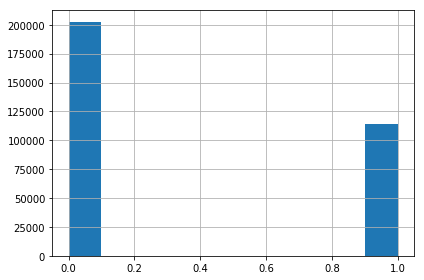

In [26]:
hist = test_results.test.hist()
plt.tight_layout()

This appears to be the balance we should expect. 

Let's fix the price field, will help with some later steps

In [63]:
test_results.loc[test_results.test == 0, 'price'] = 39.0
test_results.loc[test_results.test == 1, 'price'] = 59.0

Let's quickly check the converted field.

In [27]:
test_results.loc[(test_results.converted != 0) & (test_results.converted != 1)]

,user_id,timestamp,source,device,operative_system,test,price,converted


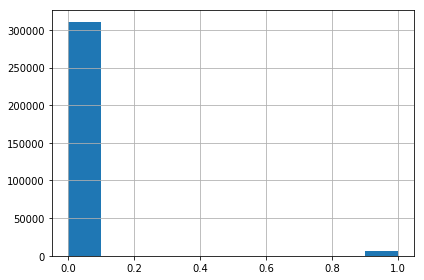

In [28]:
hist = test_results.converted.hist()
plt.tight_layout()

In [30]:
test_results.loc[test_results.converted == 1].shape

(5808, 8)

Wow. Looks like a very low conversion rate overall. About 6000 conversions across 300000 rows. That's about 2%.

In [33]:
test_results.loc[test_results.test == 0].converted.mean()

0.019903614220108817

In [34]:
test_results.loc[test_results.test == 1].converted.mean()

0.015542678810936857

So, users at the lower price have a conversion rate of 1.99%, while the higher price have a conversion rate of 1.55%

They want to know if the price should increased. Of course there will be a lower conversion rate at the higher price, but does the increased price make up for the lower conversion rate? And should certain users be targeted for price increase while others are not

Given these conversion rates, does it justify the price increase across the board without digging any deeper or thinking about targeting specific users?

In [35]:
test_results.loc[test_results.test == 0].converted.mean() * 39

0.7762409545842438

In [36]:
test_results.loc[test_results.test == 1].converted.mean() * 59

0.9170180498452746

Looks like yes, an across the board price increase would increase revenue. For the above comparison I could create an example of 1000 users or some other number. Remember I am presenting this to the VP of product, so don't be too technical. 

Let's do some exploration of the user variables we might want to use

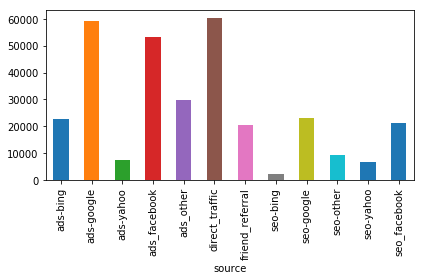

In [43]:
grouped=test_results.groupby(['source']).size()
source_bar_plot = grouped.plot(kind='bar')
plt.tight_layout()

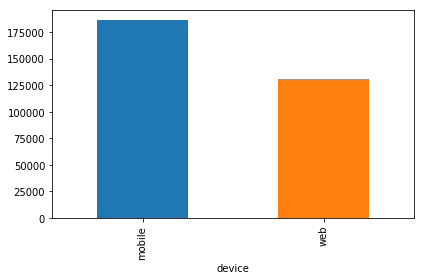

In [44]:
grouped=test_results.groupby(['device']).size()
device_bar_plot = grouped.plot(kind='bar')
plt.tight_layout()

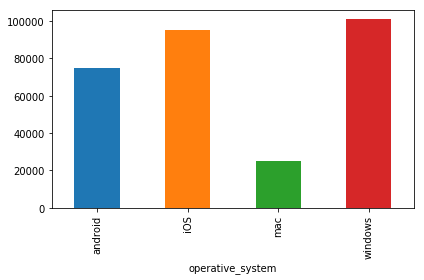

In [88]:
grouped=test_results.groupby(['operative_system']).size()
os_bar_plot = grouped.plot(kind='bar')
plt.tight_layout()

In [87]:
# need to fix the fields above
test_results.loc[test_results.operative_system == 'anroid', 'operative_system'] = 'android'
test_results.loc[test_results.operative_system == 'i0S', 'operative_system'] = 'iOS'
test_results.loc[test_results.operative_system == 'wnddows', 'operative_system'] = 'windows'
test_results.loc[test_results.operative_system == 'apple', 'operative_system'] = 'mac'

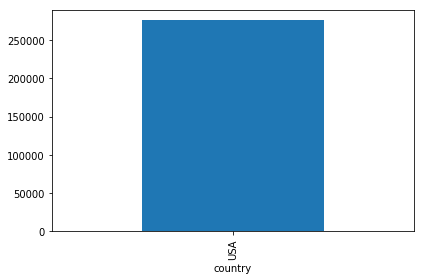

In [46]:
grouped=user_table.groupby(['country']).size()
country_bar_plot = grouped.plot(kind='bar')
plt.tight_layout()

So, all of the users are in the US. We could look at location to see how that affects conversion rate. But let's ignore it for now. I could take a quick look at city to see how many unique cities we have (and tests per city) and how easy it would be to investigate the effects.

In [99]:
user_table.city.nunique()

923

In [103]:
grouped=user_table.groupby(['city']).size()
grouped

city
Abilene              431
Akron                359
Alameda              175
Albany               548
Albuquerque            3
Alexandria           147
Alhambra              44
Aliso Viejo          183
Allen                109
Allentown            271
Aloha                 56
Altadena              70
Altamonte Springs    113
Altoona               12
Amarillo             542
Ames                 227
Anaheim              809
Anchorage            522
Anderson              98
Andover              211
Ann Arbor            169
Annandale             83
Antioch              236
Apple Valley         204
Appleton             236
Arcadia               69
Arden-Arcade         337
Arlington            241
Arlington Heights     45
Arvada               366
                    ... 
West Seneca          144
West Valley City     151
Westborough           77
Westfield            106
Westland             189
Westminster          416
Weston                57
Weymouth              12
Wheaton             

In [89]:
test_results_select = test_results[['test','device','source','operative_system','converted','price']]

In [ ]:
# the complete segmentation
segmented_results = test_results_select.groupby(['test','device','source','operative_system']).mean()
segmented_results['revenue'] = segmented_results['converted']*segmented_results['price']
segmented_results = segmented_results.sort_values('revenue', ascending = False)

In [101]:
segmented_results = test_results_select.groupby(['test','operative_system']).mean()
segmented_results['revenue'] = segmented_results['converted']*segmented_results['price']
segmented_results = segmented_results.sort_values('revenue', ascending = False)
segmented_results.head(100)

converted  price   revenue
test operative_system                            
1    mac                0.021218   59.0  1.251864
     iOS                0.019994   59.0  1.179649
0    mac                0.025480   39.0  0.993706
     iOS                0.023587   39.0  0.919909
1    windows            0.013990   59.0  0.825385
0    windows            0.018698   39.0  0.729207
1    android            0.012348   59.0  0.728531
0    android            0.016366   39.0  0.638270

I don't really know if these groups are statistically significant, how would I figure that out? ANOVA? I have so many groups, otherwise would use a t-test.

In [95]:
segmented_results_count = test_results_select.groupby(['test','device','source','operative_system']).size()

In [96]:
segmented_results_count

test  device  source           operative_system
0     mobile  ads-bing         android              3455
                               iOS                  4505
              ads-google       android              8790
                               iOS                 11724
              ads-yahoo        android              1103
                               iOS                  1546
              ads_facebook     android              8030
                               iOS                 10567
              ads_other        android              4473
                               iOS                  5717
              direct_traffic   android              9393
                               iOS                 11811
              friend_referral  android              3163
                               iOS                  4087
              seo-bing         android               304
                               iOS                   468
              seo-google       android  

Not really sure what to do next, but what do I notice? Obviously friend referral is a strong way to get a conversion

I could look at each combination of user fatures to see whether it makes sense to increase price or not for that particular user base. Could also look at overall conversion rates to say whether or not they should be increasing targeting to certain user bases (e.g. friend referrals, mac/ios).

I think the answer to question number 3 will probably be "it depends" on how many features you want to segment by. If we are not segmenting at all, we have plenty big of a sample. If we are just segmenting by one feature, probably also big enough. But how do I tell that definitively?

I could talk about how we would use the location data if given more time. For example, it would be interesting to see if there is an effect of city, and if so, what is unique about those cities that leads to their higher conversion rates (i.e. do they have higher incomes, does a particular industry work there)

How could we use the timestamp?